Loaded: C:\Users\abhin\Downloads\diabetes (4).csv shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Column dtypes and unique counts:


,dtype,n_unique
Pregnancies,int64,17
Glucose,int64,136
BloodPressure,int64,47
SkinThickness,int64,51
Insulin,int64,186
BMI,float64,248
DiabetesPedigreeFunction,float64,517
Age,int64,52
Outcome,int64,2



Missing value counts (raw):


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Numeric columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


<Figure size 1200x600 with 0 Axes>

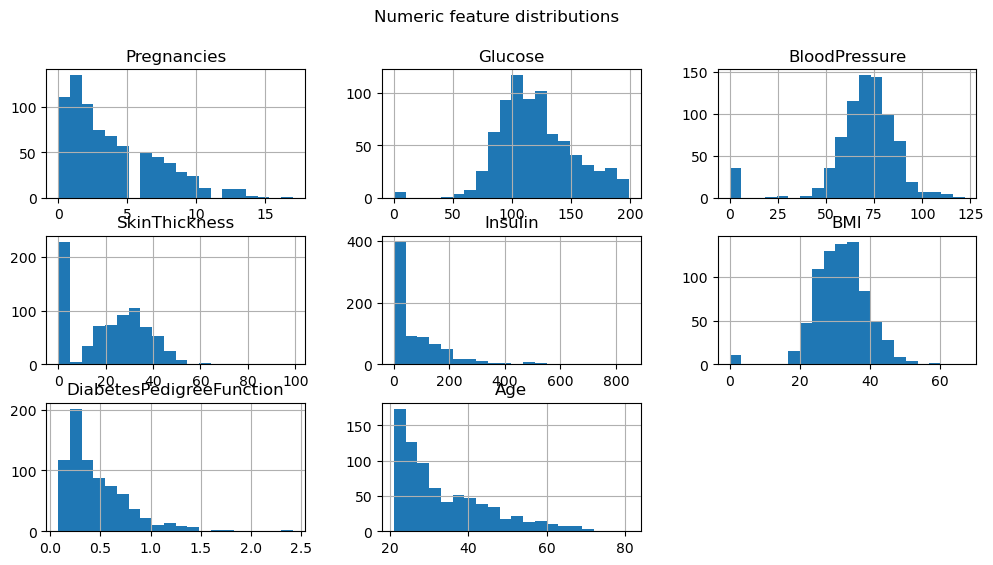

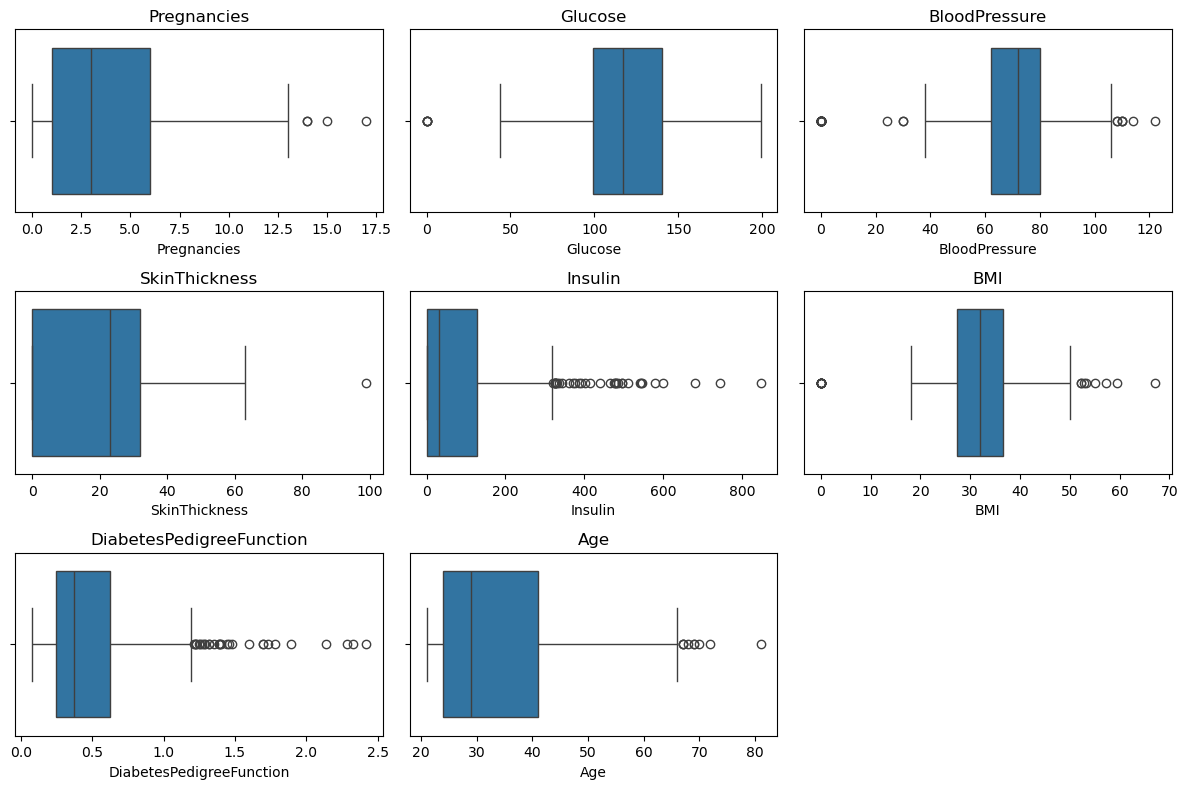

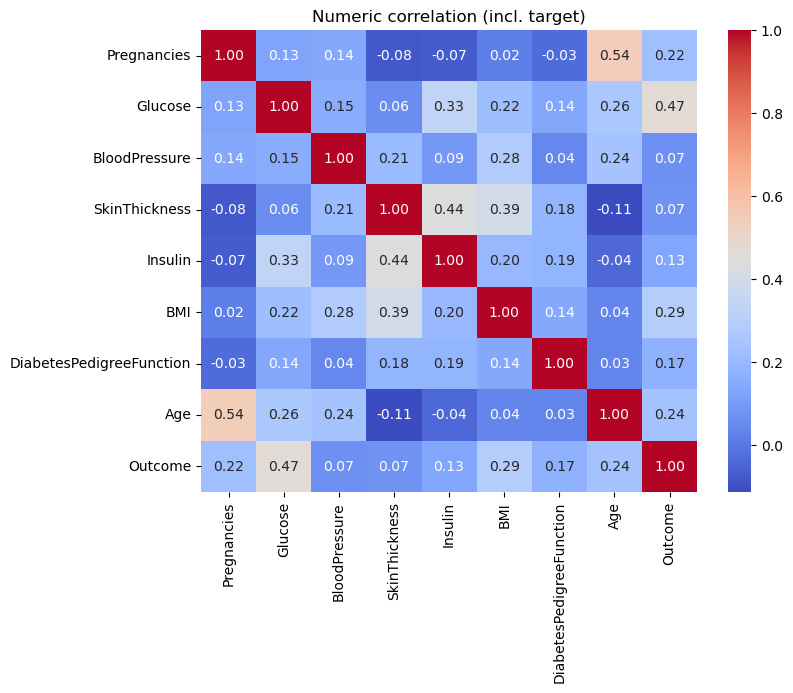


EDA notes (quick):
- PIMA dataset: certain zeros represent missing values (Glucose, BloodPressure, SkinThickness, Insulin, BMI).
- We'll replace such zeros with NaN and impute using median inside pipeline to avoid leakage.

Missing counts after zero-as-missing conversion:


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


Numeric features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Categorical features: []

Train/Test shapes: (614, 8) (154, 8)
Class distribution in train: [400 214]
Class distribution in test: [100  54]

GridSearch best params: {'clf__C': 1, 'clf__penalty': 'l2'}

=== Logistic (GridSearch Best) (threshold=0.5) ===
Accuracy: 0.6948  Precision: 0.5745  Recall: 0.5000  F1: 0.5347  ROC-AUC: 0.8128

Classification report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154

Confusion matrix:
 [[80 20]
 [27 27]]


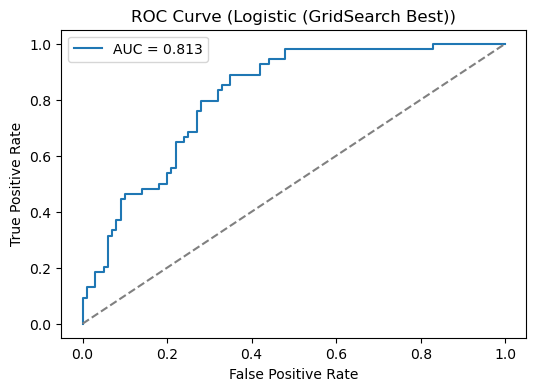


Top coefficients (positive influence on outcome=1):


,feature,coef,odds_ratio
1,Glucose,1.180669,3.256551
5,BMI,0.687163,1.988068
0,Pregnancies,0.376479,1.457145
6,DiabetesPedigreeFunction,0.233145,1.262565
7,Age,0.147296,1.158697
3,SkinThickness,0.027398,1.027776
2,BloodPressure,-0.044031,0.956925
4,Insulin,-0.066132,0.936007



Top negative coefficients (reduce probability):


,feature,coef,odds_ratio
1,Glucose,1.180669,3.256551
5,BMI,0.687163,1.988068
0,Pregnancies,0.376479,1.457145
6,DiabetesPedigreeFunction,0.233145,1.262565
7,Age,0.147296,1.158697
3,SkinThickness,0.027398,1.027776
2,BloodPressure,-0.044031,0.956925
4,Insulin,-0.066132,0.936007



Interpretation tip: positive coef -> higher log-odds of diabetes; odds_ratio > 1 increases odds.

Best threshold by F1 on test: 0.244 (F1=0.701)

=== Logistic (threshold=0.244) (threshold=0.24387018451186934) ===
Accuracy: 0.7338  Precision: 0.5783  Recall: 0.8889  F1: 0.7007  ROC-AUC: 0.8128

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.65      0.76       100
           1       0.58      0.89      0.70        54

    accuracy                           0.73       154
   macro avg       0.75      0.77      0.73       154
weighted avg       0.80      0.73      0.74       154

Confusion matrix:
 [[65 35]
 [ 6 48]]


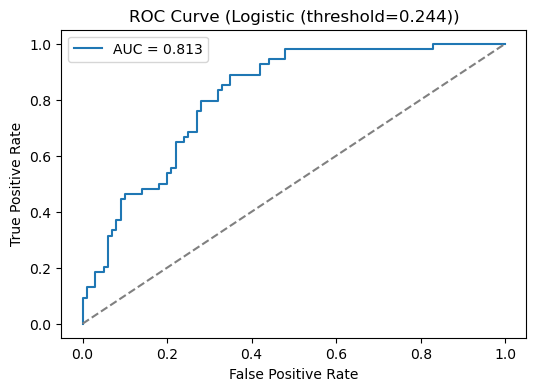

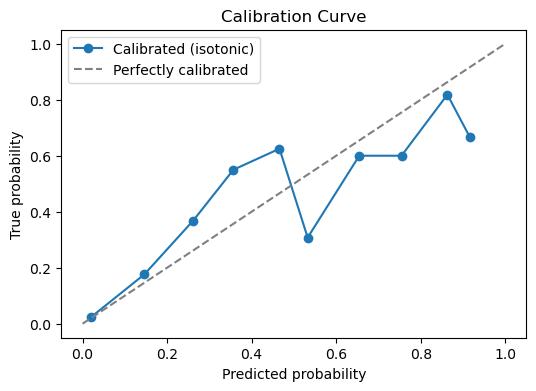

Uncalibrated ROC-AUC: 0.8128 | Calibrated ROC-AUC: 0.8102
Saved calibrated pipeline to: calibrated_pipeline.pkl

Saved logistic_model.pkl to working folder.
Wrote Streamlit app to streamlit_app.py
Run locally: pip install streamlit (if needed) then: streamlit run streamlit_app.py

Submission checklist:
- Notebook with EDA, preprocessing, model building, evaluation, coefficient interpretation
- Saved model: logistic_model.pkl
- Calibrated model: calibrated_pipeline.pkl
- Streamlit app file: streamlit_app.py
- Note selected threshold and calibration approach in your write-up.


In [1]:
# ===========================
# Logistic Regression assignment — PIMA Diabetes (updated & fixed)
# Uses local dataset path: C:\Users\abhin\Downloads\diabetes (4).csv
# Includes: EDA, preprocessing, modeling, evaluation, interpretation, threshold tuning,
# calibration (robust to sklearn versions), save model, and writes streamlit_app.py.
# ===========================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, classification_report, confusion_matrix,
                             precision_recall_curve)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import joblib
import warnings
warnings.filterwarnings('ignore')

# -----------------------
# Settings (local Windows path)
# -----------------------
DATA_PATH = r"C:\Users\abhin\Downloads\diabetes (4).csv"   # <-- your local file
TARGET = "Outcome"                                         # PIMA dataset
TEST_SIZE = 0.2
RANDOM_STATE = 42

# -----------------------
# 1) Load dataset & basic info
# -----------------------
df = pd.read_csv(DATA_PATH)
print("Loaded:", DATA_PATH, "shape:", df.shape)
display(df.head())

print("\nColumn dtypes and unique counts:")
display(pd.DataFrame({'dtype': df.dtypes, 'n_unique': df.nunique()}))

print("\nMissing value counts (raw):")
display(df.isna().sum())

# -----------------------
# 2) EDA: distributions, boxplots and correlations
# -----------------------
# Identify numeric feature list (exclude target)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if TARGET in numeric_cols:
    numeric_cols = [c for c in numeric_cols if c != TARGET]

print("\nNumeric columns:", numeric_cols)
display(df[numeric_cols].describe().T)

# Histograms
plt.figure(figsize=(12,6))
df[numeric_cols].hist(bins=20, figsize=(12,6))
plt.suptitle("Numeric feature distributions")
plt.show()

# Boxplots to check outliers
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation matrix (numeric only)
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols + [TARGET]].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Numeric correlation (incl. target)")
plt.show()

print("\nEDA notes (quick):")
print("- PIMA dataset: certain zeros represent missing values (Glucose, BloodPressure, SkinThickness, Insulin, BMI).")
print("- We'll replace such zeros with NaN and impute using median inside pipeline to avoid leakage.")

# -----------------------
# 3) Data preprocessing: treat zeros as missing, impute, encode, scale
# -----------------------
zero_as_missing_cols = [c for c in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] if c in df.columns]
for c in zero_as_missing_cols:
    df[c] = df[c].replace(0, np.nan)

print("\nMissing counts after zero-as-missing conversion:")
display(df[zero_as_missing_cols].isna().sum())

# Separate X, y
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

# Feature lists
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()

print("\nNumeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Preprocessing pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', cat_transformer, categorical_features)
], remainder='drop')

# -----------------------
# 4) Train/test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

print("\nTrain/Test shapes:", X_train.shape, X_test.shape)
print("Class distribution in train:", np.bincount(y_train))
print("Class distribution in test:", np.bincount(y_test))

# -----------------------
# 5) Model building: logistic regression pipeline + GridSearchCV (C tuning)
# -----------------------
log_pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, solver='liblinear'))
])

param_grid = {
    'clf__C': [0.01, 0.1, 1, 5, 10],
    'clf__penalty': ['l2']
}

gs = GridSearchCV(log_pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
gs.fit(X_train, y_train)

print("\nGridSearch best params:", gs.best_params_)
best_model = gs.best_estimator_

# -----------------------
# 6) Model evaluation on test set (accuracy, precision, recall, f1, roc_auc) + ROC
# -----------------------
def evaluate_classifier(model, X_test_local, y_test_local, thresh=0.5, name="Model"):
    probs = model.predict_proba(X_test_local)[:,1]
    preds = (probs >= thresh).astype(int)
    acc = accuracy_score(y_test_local, preds)
    prec = precision_score(y_test_local, preds, zero_division=0)
    rec = recall_score(y_test_local, preds, zero_division=0)
    f1 = f1_score(y_test_local, preds, zero_division=0)
    auc = roc_auc_score(y_test_local, probs)
    print(f"\n=== {name} (threshold={thresh}) ===")
    print(f"Accuracy: {acc:.4f}  Precision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}  ROC-AUC: {auc:.4f}")
    print("\nClassification report:\n", classification_report(y_test_local, preds, zero_division=0))
    print("Confusion matrix:\n", confusion_matrix(y_test_local, preds))
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test_local, probs)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title(f'ROC Curve ({name})'); plt.legend()
    plt.show()
    return {'probs': probs, 'acc':acc, 'prec':prec, 'rec':rec, 'f1':f1, 'auc':auc}

eval_base = evaluate_classifier(best_model, X_test, y_test, thresh=0.5, name="Logistic (GridSearch Best)")

# -----------------------
# 7) Coefficients & interpretation
# -----------------------
preprocessor_fitted = best_model.named_steps['pre']
num_names = numeric_features.copy()
cat_names = []
if categorical_features:
    ohe = preprocessor_fitted.named_transformers_['cat'].named_steps['ohe']
    cat_names = ohe.get_feature_names_out(categorical_features).tolist()
feature_names = num_names + cat_names

coefs = best_model.named_steps['clf'].coef_[0]
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs})
coef_df['odds_ratio'] = np.exp(coef_df['coef'])
coef_df = coef_df.sort_values('coef', ascending=False)
print("\nTop coefficients (positive influence on outcome=1):")
display(coef_df.head(10))
print("\nTop negative coefficients (reduce probability):")
display(coef_df.tail(10))

print("\nInterpretation tip: positive coef -> higher log-odds of diabetes; odds_ratio > 1 increases odds.")

# -----------------------
# 8) Threshold tuning: choose threshold maximizing F1 on test
# -----------------------
probs = eval_base['probs']
precisions, recalls, thresholds = precision_recall_curve(y_test, probs)
f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-12)
best_idx = np.nanargmax(f1_scores)
best_thresh = thresholds[best_idx] if len(thresholds) > 0 else 0.5
print(f"\nBest threshold by F1 on test: {best_thresh:.3f} (F1={f1_scores[best_idx]:.3f})")

eval_thresh = evaluate_classifier(best_model, X_test, y_test, thresh=best_thresh, name=f"Logistic (threshold={best_thresh:.3f})")

# -----------------------
# 9) Calibration (robust to sklearn versions)
# -----------------------
# Wrap the entire pipeline (best_model) in CalibratedClassifierCV. Some sklearn versions expect
# estimator=, others base_estimator=. Try estimator= first, fallback to base_estimator=.
try:
    calibrator = CalibratedClassifierCV(estimator=best_model, cv=3, method='isotonic')
except TypeError:
    calibrator = CalibratedClassifierCV(base_estimator=best_model, cv=3, method='isotonic')

# Fit calibrator on training data (it accepts raw X because best_model is a pipeline)
calibrator.fit(X_train, y_train)

# Get calibrated probabilities on the test set
probs_cal = calibrator.predict_proba(X_test)[:, 1]

# Compute and plot calibration curve
prob_true, prob_pred = calibration_curve(y_test, probs_cal, n_bins=10)
plt.figure(figsize=(6,4))
plt.plot(prob_pred, prob_true, marker='o', label='Calibrated (isotonic)')
plt.plot([0,1],[0,1],'--', color='gray', label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()

# Optional: compare uncalibrated vs calibrated (ROC-AUC)
uncal_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
calib_auc = roc_auc_score(y_test, probs_cal)
print(f"Uncalibrated ROC-AUC: {uncal_auc:.4f} | Calibrated ROC-AUC: {calib_auc:.4f}")

# Save the calibrated pipeline
joblib.dump(calibrator, 'calibrated_pipeline.pkl')
print("Saved calibrated pipeline to: calibrated_pipeline.pkl")

# -----------------------
# 10) Save final pipeline (preprocessor + classifier)
# -----------------------
final_pipeline = best_model
joblib.dump(final_pipeline, 'logistic_model.pkl')
print("\nSaved logistic_model.pkl to working folder.")

# -----------------------
# 11) Streamlit app generation
# -----------------------
streamlit_lines = [
    "import streamlit as st",
    "import joblib",
    "import pandas as pd",
    "",
    "st.title('Diabetes Prediction (Logistic Regression)')",
    "",
    "model = joblib.load('logistic_model.pkl')",
    "",
    "def user_input_features():",
    "    data = {}"
]

# numeric inputs
for col in numeric_features:
    default = float(df[col].median()) if col in df.columns else 0.0
    streamlit_lines.append(f"    data['{col}'] = st.number_input('{col}', value={default})")
# categorical inputs (if any)
for col in categorical_features:
    options = df[col].dropna().unique().tolist()
    safe_opts = options if len(options) > 0 else ['value']
    streamlit_lines.append(f"    data['{col}'] = st.selectbox('{col}', {safe_opts})")

streamlit_lines += [
    "    return pd.DataFrame([data])",
    "",
    "input_df = user_input_features()",
    "st.write('Input:')",
    "st.write(input_df)",
    "",
    "prob = model.predict_proba(input_df)[0,1]",
    "st.write('Predicted probability of diabetes:', float(prob))",
    f"threshold = {best_thresh:.4f}",
    "st.write('Predicted class (threshold=%.3f):' % threshold, int(prob >= threshold))",
]

with open('streamlit_app.py', 'w') as f:
    f.write("\n".join(streamlit_lines))

print("Wrote Streamlit app to streamlit_app.py")
print("Run locally: pip install streamlit (if needed) then: streamlit run streamlit_app.py")

# -----------------------
# 12) Submission checklist (print)
# -----------------------
print("\nSubmission checklist:")
print("- Notebook with EDA, preprocessing, model building, evaluation, coefficient interpretation")
print("- Saved model: logistic_model.pkl")
print("- Calibrated model: calibrated_pipeline.pkl")
print("- Streamlit app file: streamlit_app.py")
print("- Note selected threshold and calibration approach in your write-up.")


